#  <center> Surface Restoring </center> #

In [10]:
# Load in Modules
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
import SG
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [11]:
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
fname = x+'/3daynokpp/'
c = utils.ChannelSetup(output_dir=str(fname))
Tavlat = c.get_zonal_avg('Tav.nc','THETA')
Tref = Tavlat[0,:]
Tref[-1] = Tref[-2]
Tref[0] = Tref[1]


## My Surface Temperatures ##

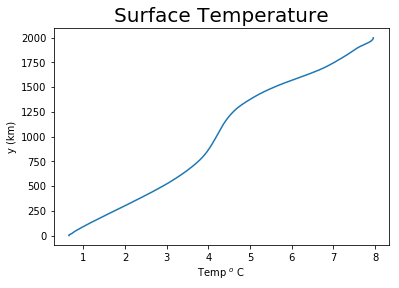

In [4]:
plt.plot(Tref,c.yc/1000)
plt.title('Surface Temperature',fontsize=20)
plt.ylabel('y (km)')
plt.xlabel('Temp $^o$ C')

\begin{equation}
T_{ref} = T_s + \frac{Q}{\rho C_p \lambda \Delta z}
\end{equation}

so

\begin{equation}
T_{s} = T_{ref} - \frac{Q}{\rho C_p \lambda \Delta z}
\end{equation}

In [12]:
Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)#*0.1
rho = 1030.0
Cp = 3985.0
lamba1 = 1.0/(30*24*60*60)
lamba2 = 1.0/(90*24*60*60)
lamba3 = 1.0/(180*24*60*60)

dz = c.dzf[0]

In [13]:
Ts11 = Tref - Q/(rho*Cp*lamba1*dz)
Ts22 = Tref - Q/(rho*Cp*lamba2*dz)
Ts33 = Tref - Q/(rho*Cp*lamba3*dz)


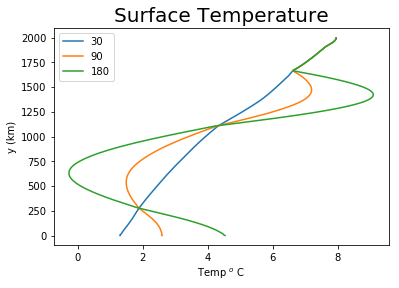

In [14]:
plt.plot(Ts11,c.yc/1000)
plt.plot(Ts22,c.yc/1000)
plt.plot(Ts33,c.yc/1000)
plt.title('Surface Temperature',fontsize=20)
plt.ylabel('y (km)')
plt.xlabel('Temp $^o$ C')
plt.legend(['30','90','180'])

## Closed ##

In [106]:
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis'
fname = x+'/Closeddaynokpp/'
c = utils.ChannelSetup(output_dir=str(fname))
Tavlat = c.get_zonal_avg('Tav.nc','THETA')
Tref = (Tavlat[0,:])/1.6-1

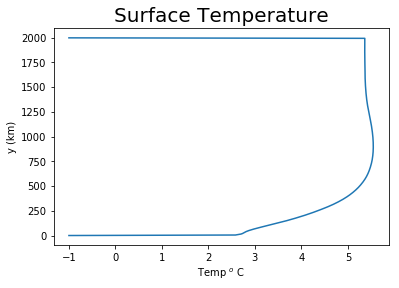

In [107]:
plt.plot(Tref,c.yc/1000)
plt.title('Surface Temperature',fontsize=20)
plt.ylabel('y (km)')
plt.xlabel('Temp $^o$ C')

In [108]:
Q = c.mnc('SURF.nc', 'oceQnet').mean(axis=0).mean(axis=1)
rho = 1030.0
Cp = 3985.0
lamba = 1.0/(30*24*60*60)
dz = c.dzf[0]

In [109]:
Ts1 = Tref - Q/(rho*Cp*lamba1*dz)
Ts2 = Tref - Q/(rho*Cp*lamba2*dz)
Ts3 = Tref - Q/(rho*Cp*lamba3*dz)
Ts4 = Tref - Q/(rho*Cp*lamba4*dz)
Ts1[-1] = Ts1[-2]
Ts1[0] = Ts1[1]
Ts2[-1] = Ts2[-2]
Ts2[0] = Ts2[1]
Ts3[-1] = Ts3[-2]
Ts3[0] = Ts3[1]
Ts4[-1] = Ts4[-2]
Ts4[0] = Ts4[1]

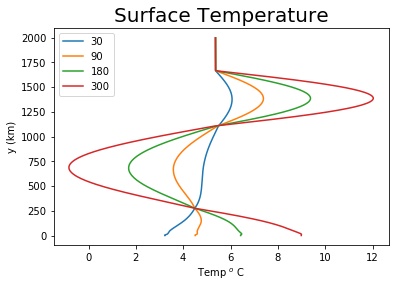

In [110]:
#plt.plot(SG.savitzky_golay(Ts,51,1),c.yc/1000)
plt.plot(Ts1,c.yc/1000)
plt.plot(Ts2,c.yc/1000)
plt.plot(Ts3,c.yc/1000)
plt.plot(Ts4,c.yc/1000)
plt.title('Surface Temperature',fontsize=20)
plt.ylabel('y (km)')
plt.xlabel('Temp $^o$ C')
plt.legend(['30','90','180','300'])

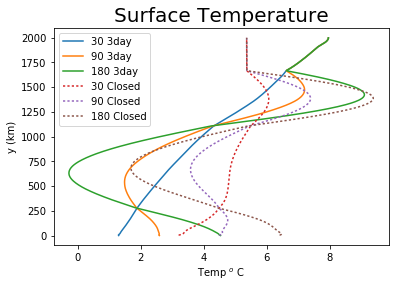

In [113]:
plt.plot(Ts11,c.yc/1000)
plt.plot(Ts22,c.yc/1000)
plt.plot(Ts33,c.yc/1000)
plt.plot(Ts1,c.yc/1000,linestyle=':')
plt.plot(Ts2,c.yc/1000,linestyle=':')
plt.plot(Ts3,c.yc/1000,linestyle=':')
plt.title('Surface Temperature',fontsize=20)
plt.ylabel('y (km)')
plt.xlabel('Temp $^o$ C')
plt.legend(['30 3day','90 3day','180 3day','30 Closed','90 Closed','180 Closed',])